# Veri Ön-İşleme Aşaması
Bu defter, temel veri ön işleme adımlarını içermek için hazırlanmıştır.
Ön işleme, verilere makine öğrenimi algoritmalarına beslenmeden önce uygulanan dönüşümleri ifade eder.
Farklı kaynaklardan toplanan veriler, genelde analiz için uygun olmayan ham formatta toplanır.
Veri Ön İşleme tekniği, ham verileri temiz bir veri kümesine dönüştürmek için kullanılır.

Gerçek dünya verileri genellikle
Eksiktir: öznitelik değerlerinden yoksundur veya yalnızca toplu verileri içerebilir.
Gürültülü: hatalar veya aykırı değerler içerebilir.
Tutarsız: kodlarda veya adlarda tutarsızlıklar içeriyor olabilir.

Bu alıştırma için kaggle'dan "CarPrice_Assignment.csv" isimli örnek bir veri seti indirildi. Çalışma için bir parça manipüle edildi ve veri seti tekrar yüklendi. 


In [1]:
#--------------------------------------------------------------
#       Adım 1 : Kütüphaneleri içe aktarma                   
#--------------------------------------------------------------
# NumPy, Python için bir modüldür. "Sayısal Python" için bir kısaltmadır.
# Bu, Numpy'nin önceden derlenmiş matematiksel ve sayısal işlevlerinin ve işlevlerinin büyük yürütme hızını garanti etmesini sağlar.

# Pandas, güçlü veri yapılarını kullanarak yüksek performanslı veri işleme ve analiz aracı sağlayan açık kaynaklı bir Python Kitaplığıdır.
# Pandas adı, Çok Boyutlu verilerden bir Ekonometri olan Panel Veri kelimesinden türetilmiştir.

#Matplotlib, Python'da statik, hareketli ve etkileşimli görselleştirmeler oluşturmak için kapsamlı bir kitaplıktır.
#Matplotlib zor şeyleri mümkün kılar.

#Seaborn, grafikleri çizmek için Matplotlib'i kullanan bir kütüphanedir.

# Python'daki OS modülü, işletim sistemine bağlı işlevselliği kullanmanın bir yolunu sunar.
# OS modülünün sağladığı işlevler, Windows, Mac veya Linux olsun, Python'un üzerinde çalıştığı temel işletim sistemi ile arayüz oluşturmanıza olanak tanır.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sbn
import sklearn
import os
print(os.listdir("../input"))



# Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

['car-price']


Kullanacağımız veri setini "New Dataset" seçeneğinden ekleyebileceğimiz gibi, "+ Add Data" seçeneğinden kaggle a daha önce eklenmiş bir dataseet çalışmamıza ekleyebiliriz. 

Kullanacağımız dataset açıklaması:
Problem Açıklama: Çinli bir otomobil şirketi Geely Auto, üretim birimini orada kurarak ve ABD'li ve Avrupalı ​​meslektaşlarıyla rekabet edebilmek için yerel olarak otomobil üreterek ABD pazarına girmeyi hedefliyor. Araba fiyatlarının bağlı olduğu faktörleri anlamak için bir otomobil danışmanlık şirketiyle anlaştılar. Özellikle, Çin pazarından çok farklı olabileceğinden, Amerikan pazarındaki arabaların fiyatlandırılmasını etkileyen faktörleri anlamak istiyorlar. Şirket şunu bilmek istiyor: Bir arabanın fiyatını tahmin etmede hangi değişkenlerin önemli olduğu Bu değişkenlerin bir arabanın fiyatını ne kadar iyi tanımladığı Çeşitli pazar araştırmalarına dayanarak, danışmanlık firması Amerika genelinde farklı araba türlerinden oluşan geniş bir veri seti topladı pazar. İş Hedefi Arabaların fiyatını mevcut bağımsız değişkenlerle modellememiz gerekiyor. Yönetim tarafından fiyatların bağımsız değişkenlerle tam olarak nasıl değiştiğini anlamak için kullanılacaktır. Buna göre belirli fiyat seviyelerini karşılamak için arabaların tasarımını, iş stratejisini vb. değiştirebilirler. Ayrıca model, yönetimin yeni bir pazarın fiyatlandırma dinamiklerini anlaması için iyi bir yol olacaktır. Lütfen Dikkat: Sağlanan veri seti öğrenme amaçlıdır. Lütfen gerçek dünya senaryosu ile herhangi bir çıkarım yapmayın.




In [2]:
#---------------------------------------------------------------
#       Adım 2: Veri Kümesini İçe Aktarma                       
#---------------------------------------------------------------

#'Data.csv' dosyasını oku ve verileri dataset değişkenine ata.
dataset = pd.read_csv("../input/car-price/CarPrice.csv")
print('Loading the datasets...')


#Veri setinin ilk beş satırını gösterir.
dataset.head()

Loading the datasets...


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


Keşifsel Veri Analizi (Exploratory Data Analysis - EDA)
Veri çerçevesinde ele alınması gereken eksik değerler var.
Kategori veri türü olarak tanımlamak istersek, ele alınması gereken birden fazla tercih içerir.
Yüksekliği sayısal bir miktarda çıkarmak için yükseklik sütununun ayrıştırılması gerekiyor, şu anda bir dize (nesne) gibi görünüyor.
Bazı sütunlar, boşlukları kaldırmak için bazı yeniden adlandırmalarla yapabilir.
Pandas erişim kolaylığı için sütunların isimlerini ele alıyoruz.

In [3]:
#Veri setinin son beş satırını gösterir.
dataset.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134.0,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,23.0,106.0,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400,19,25,22625.0


In [4]:
# columns sütun isimlerini verir
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
# veya columns sütun isimlerini verir
dataset.columns.to_list()

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [6]:
# shape sütun ve satırların sayısını verir
dataset.shape

(205, 26)

In [7]:
#--------------------------------------------------------------
#       Adım 3 : Eksik ve hatalı verileri bulma                   
#--------------------------------------------------------------
# info veri tipini, sütun ve satır sayısını, hafıza kullanımı bilgilerini verir
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          198 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        202 non-null    float64
 1

In [8]:
#isnull any(axis=0) ile yani kolon yönünde boş hücre var ise True değeri verir.
dataset.isnull().any(axis=0)

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth             True
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize           True
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower           True
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [9]:
#dataset de boş olan veri miktarına bakalım
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            7
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          3
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          4
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
#Eksik verileri tamamlamanın bir yolu kolonun ortalamasını almaktır.
#Bu karar veri seti incelendikten sonra sonucu değiştirmeyeceği düşünülürse uygulanır.
dataset.fillna(dataset.mean(), inplace = True)

In [11]:
#Eksik verileri tamamlamanın diğer.
#data.dropna()
#data.dropna(how='any')
#data.dropna(how='all')
#data.dropna(how='all',axis=1)
#data.dropna(how='any',axis='columns')
#data.fillna(value=1)
#data.fillna(0)
#data.fillna(method="ffill")


In [12]:
#Veri incelendiğnde eksik veri yada null veri kalmadığı gözlemlenir.
dataset.isnull().any(axis=0)

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [13]:
#dataset de boş olan veri miktarına tekrar bakalım
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [14]:
#Veriyi detaylı tanıyalım
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02
mean,103.000000,0.834146,98.756585,174.049268,65.925758,53.724878,1.439897e+05,127.158416,3.329756,3.255415,10.142537,104.000000,5125.121951,25.219512,1445.243902,6.120045e+06
std,59.322565,1.245307,6.021776,12.337289,2.143068,2.443522,2.025274e+06,41.591438,0.270844,0.313597,3.972040,39.535415,476.985643,6.542142,20252.331390,6.167464e+07
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,3.000000e+00,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5.118000e+03
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2.145000e+03,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7.895000e+03
50%,103.000000,1.000000,97.000000,173.200000,65.600000,54.100000,2.414000e+03,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,1.059500e+04
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2.926000e+03,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,36.000000,1.655800e+04
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,2.900005e+07,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,290000.000000,6.290000e+08


<AxesSubplot:xlabel='price', ylabel='Density'>

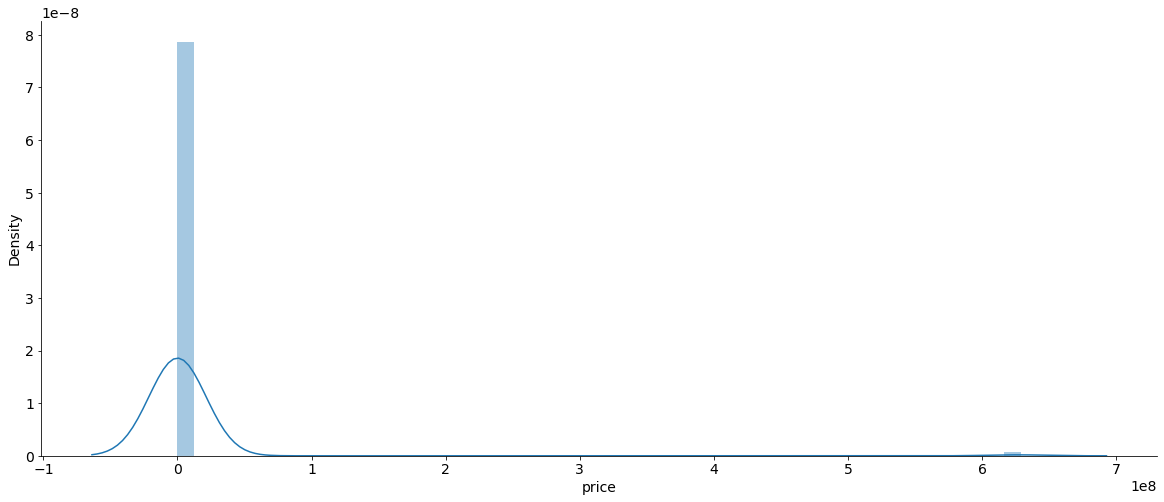

In [15]:
#Veri tanımlamasında dikkatimizi çeken aşrılıkları ve farklılıkları gözlemlediğimizde,
#Özellikle min max değerleri arasında çok fazla fak olan kolonların dağılımlarını inceleyelim.
sbn.distplot(dataset["price"])

In [16]:
# "price" kolonunu büyükten küçüğe ilk 15 satırı sıralayalım.
dataset.sort_values("price", ascending=False).head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
19,20,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,...,90.0,2bbl,3.03,3.11,9.6,70.0,5400,38,43,629000005.0
24,25,1,dodge monaco (sw),gas,std,four,hatchback,fwd,front,93.7,...,90.0,2bbl,2.97,3.23,9.4,68.0,5500,31,38,622900000.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304.0,mpfi,3.80,3.35,8.0,184.0,4500,14,16,45400.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209.0,mpfi,3.62,3.39,8.0,182.0,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308.0,mpfi,3.80,3.35,8.0,184.0,4500,14,16,40960.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194.0,mpfi,3.74,2.90,9.5,207.0,5900,17,25,37028.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209.0,mpfi,3.62,3.39,8.0,182.0,5400,15,20,36880.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326.0,mpfi,3.54,2.76,11.5,262.0,5000,13,17,36000.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258.0,mpfi,3.63,4.17,8.1,176.0,4750,15,19,35550.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234.0,mpfi,3.46,3.10,8.3,155.0,4750,16,18,35056.0


In [17]:
# "price" kolonunda "car_ID="20" "index=19" ve "car_ID="25" "index=24" olan değerin hatalı olduğu gözlenmektedir.
# örnek olarak o satırları dataset den çıkaralım
dataset.drop(19,axis=0,inplace=True)

In [18]:
dataset.drop(24,axis=0,inplace=True)

In [19]:
dataset.sort_values("price", ascending=False).head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304.0,mpfi,3.80,3.35,8.0,184.0,4500,14,16,45400.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209.0,mpfi,3.62,3.39,8.0,182.0,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308.0,mpfi,3.80,3.35,8.0,184.0,4500,14,16,40960.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194.0,mpfi,3.74,2.90,9.5,207.0,5900,17,25,37028.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209.0,mpfi,3.62,3.39,8.0,182.0,5400,15,20,36880.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326.0,mpfi,3.54,2.76,11.5,262.0,5000,13,17,36000.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258.0,mpfi,3.63,4.17,8.1,176.0,4750,15,19,35550.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234.0,mpfi,3.46,3.10,8.3,155.0,4750,16,18,35056.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234.0,mpfi,3.46,3.10,8.3,155.0,4750,16,18,34184.0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,194.0,mpfi,3.74,2.90,9.5,207.0,5900,17,25,34028.0


<AxesSubplot:xlabel='price', ylabel='Density'>

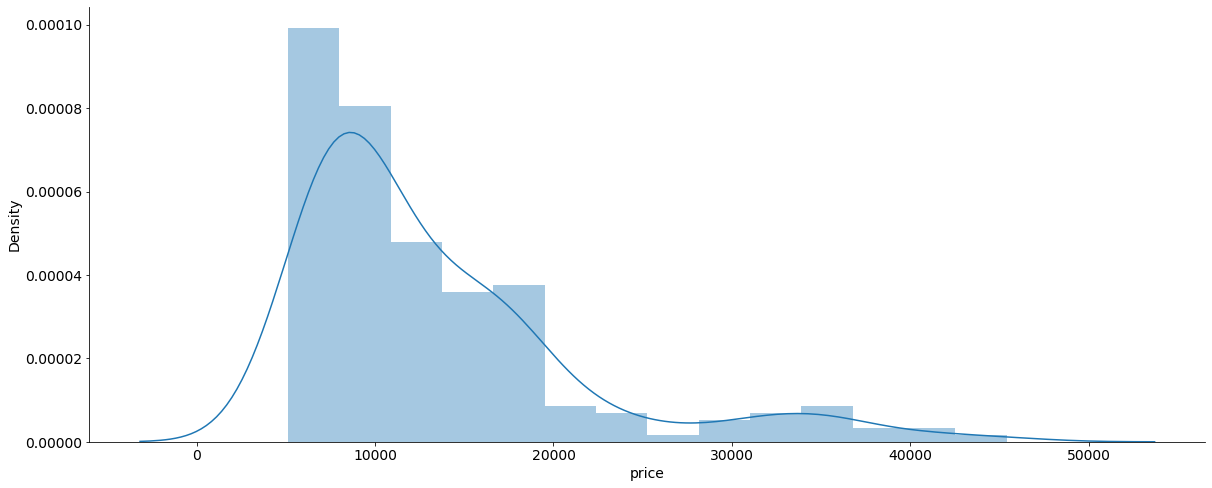

In [20]:
#Şimdi tekrar "price" için plot umuza bakalım ve normalleştğini görelim
sbn.distplot(dataset["price"])

<AxesSubplot:xlabel='highwaympg', ylabel='Density'>

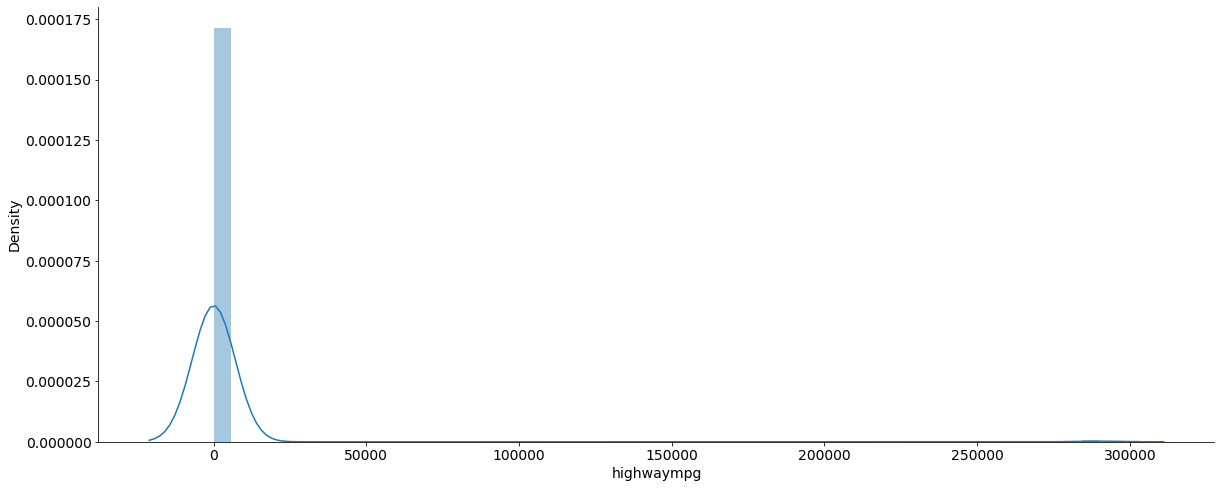

In [21]:
#Veri tanımlamasında dikkatimizi çeken aşrılıkları ve farklılıkları gözlemlediğimizde,
#Özellikle min max değerleri arasında çok fazla fak olan kolonların dağılımlarını inceleyelim.
sbn.distplot(dataset["highwaympg"])

In [22]:
# "highwaympg" kolonunu büyükten küçüğe ilk 15 satırı sıralayalım.
dataset.sort_values("highwaympg", ascending=False).head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
10,11,2,bmw 320i,gas,std,two,sedan,rwd,front,101.2,...,108.000000,mpfi,3.50,2.80,8.8,101.0,5800,23,290000,16430.0
30,31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,...,92.000000,1bbl,2.91,3.41,9.6,58.0,4800,49,54,6479.0
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61.000000,2bbl,2.91,3.03,9.5,48.0,5100,47,53,5151.0
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,103.000000,idi,2.99,3.47,21.9,55.0,4800,45,50,7099.0
159,160,0,toyota corolla,diesel,std,four,hatchback,fwd,front,95.7,...,127.158416,idi,3.27,3.35,22.5,56.0,4500,38,47,7788.0
160,161,0,toyota corona,gas,std,four,sedan,fwd,front,95.7,...,98.000000,2bbl,3.19,3.03,9.0,70.0,4800,38,47,7738.0
184,185,2,volkswagen model 111,diesel,std,four,sedan,fwd,front,97.3,...,97.000000,idi,3.01,3.40,23.0,52.0,4800,37,46,7995.0
182,183,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,97.3,...,97.000000,idi,3.01,3.40,23.0,52.0,4800,37,46,7775.0
20,21,0,chevrolet vega 2300,gas,std,four,sedan,fwd,front,94.5,...,90.000000,2bbl,3.03,3.11,9.6,70.0,5400,38,43,6575.0
44,45,1,isuzu D-Max,gas,std,two,sedan,fwd,front,94.5,...,90.000000,2bbl,3.03,3.11,9.6,70.0,5400,38,43,8916.5


In [23]:
# "highwaympg" kolonunda "car_ID="11" "index=10" olan değerin hatalı olduğu gözlenmektedir.
dataset.drop(10,axis=0,inplace=True)

<AxesSubplot:xlabel='highwaympg', ylabel='Density'>

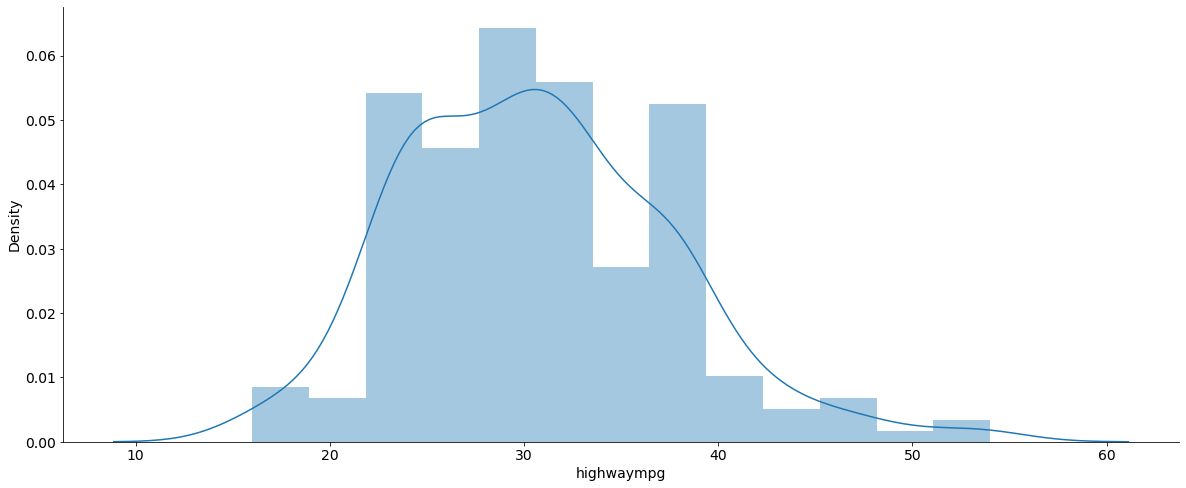

In [24]:
sbn.distplot(dataset["highwaympg"])

In [25]:
#CarName e göre gruplayıp fiyat ortalamarını alabiliriz.
dataset.groupby("CarName").mean()["price"]

CarName
Nissan versa                 5499.0
alfa-romero Quadrifoglio    16500.0
alfa-romero giulia          13495.0
alfa-romero stelvio         16500.0
audi 100 ls                 13950.0
                             ...   
volvo 246                   22470.0
volvo 264gl                 20522.5
volvo diesel                18950.0
vw dasher                   11595.0
vw rabbit                    9980.0
Name: price, Length: 145, dtype: float64

In [26]:
#Çalışmamızda kullanmacağımız kolonları kaldıralım mı?
dataset=dataset.drop("enginelocation", axis=1)

In [27]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [28]:
#Çalışmamızda kullanmacağımız kolonları kaldıralım mı?
dataset=dataset.drop("aspiration", axis=1)

In [29]:
#Çalışmamızda kullanmacağımız kolonları kaldıralım mı?
dataset=dataset.drop("carlength", axis=1)
dataset=dataset.drop("carwidth", axis=1)
dataset=dataset.drop("carheight", axis=1)
dataset=dataset.drop("wheelbase", axis=1)
dataset=dataset.drop("boreratio", axis=1)
dataset=dataset.drop("curbweight", axis=1)
dataset.head()

,car_ID,symboling,CarName,fueltype,doornumber,carbody,drivewheel,enginetype,cylindernumber,enginesize,fuelsystem,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,two,convertible,rwd,dohc,four,130.0,mpfi,2.68,9.0,111.0,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,two,convertible,rwd,dohc,four,130.0,mpfi,2.68,9.0,111.0,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,two,hatchback,rwd,ohcv,six,152.0,mpfi,3.47,9.0,154.0,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,four,sedan,fwd,ohc,four,109.0,mpfi,3.40,10.0,102.0,5500,24,30,13950.0
4,5,2,audi 100ls,gas,four,sedan,4wd,ohc,five,136.0,mpfi,3.40,8.0,115.0,5500,18,22,17450.0


In [30]:
#Veri özelliklerinin korelasyon tablosu
dataset.corr()

,car_ID,symboling,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.145146,-0.044155,-0.179535,0.147814,-0.029692,-0.187959,0.033613,0.029331,-0.120246
symboling,-0.145146,1.000000,-0.108997,-0.001670,-0.177207,0.068890,0.268721,-0.036702,0.034295,-0.081126
enginesize,-0.044155,-0.108997,1.000000,0.201501,0.045891,0.803592,-0.246516,-0.644938,-0.669558,0.872516
stroke,-0.179535,-0.001670,0.201501,1.000000,0.184429,0.082944,-0.056879,-0.040350,-0.041845,0.080652
compressionratio,0.147814,-0.177207,0.045891,0.184429,1.000000,-0.206199,-0.435630,0.330296,0.269995,0.067533
horsepower,-0.029692,0.068890,0.803592,0.082944,-0.206199,1.000000,0.138466,-0.799994,-0.768554,0.807171
peakrpm,-0.187959,0.268721,-0.246516,-0.056879,-0.435630,0.138466,1.000000,-0.122607,-0.062900,-0.083001
citympg,0.033613,-0.036702,-0.644938,-0.040350,0.330296,-0.799994,-0.122607,1.000000,0.970849,-0.683649
highwaympg,0.029331,0.034295,-0.669558,-0.041845,0.269995,-0.768554,-0.062900,0.970849,1.000000,-0.695219
price,-0.120246,-0.081126,0.872516,0.080652,0.067533,0.807171,-0.083001,-0.683649,-0.695219,1.000000


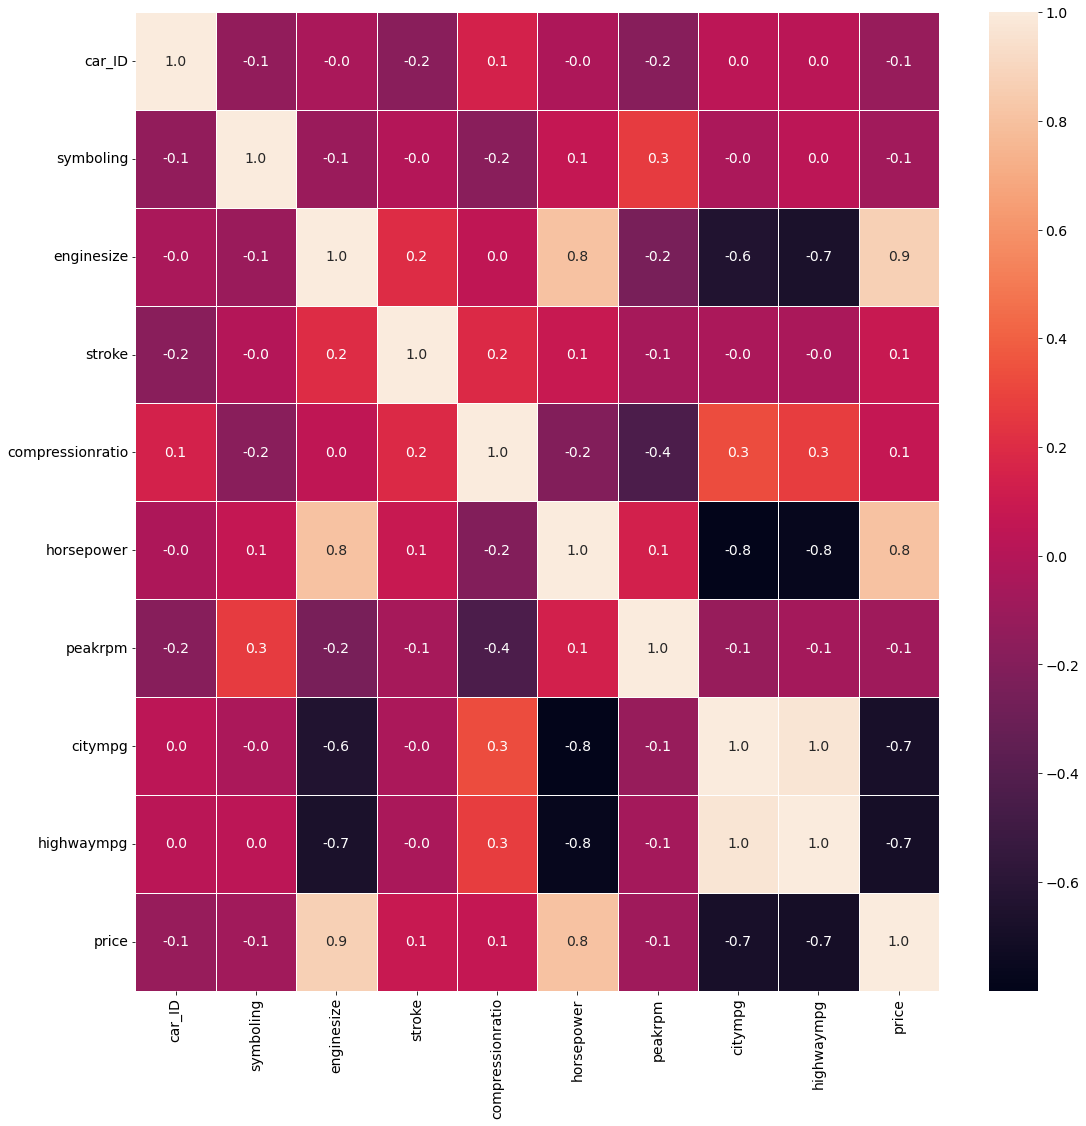

In [31]:
# korelasyon haritası 
f,ax = plt.subplots(figsize=(18, 18))
sbn.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

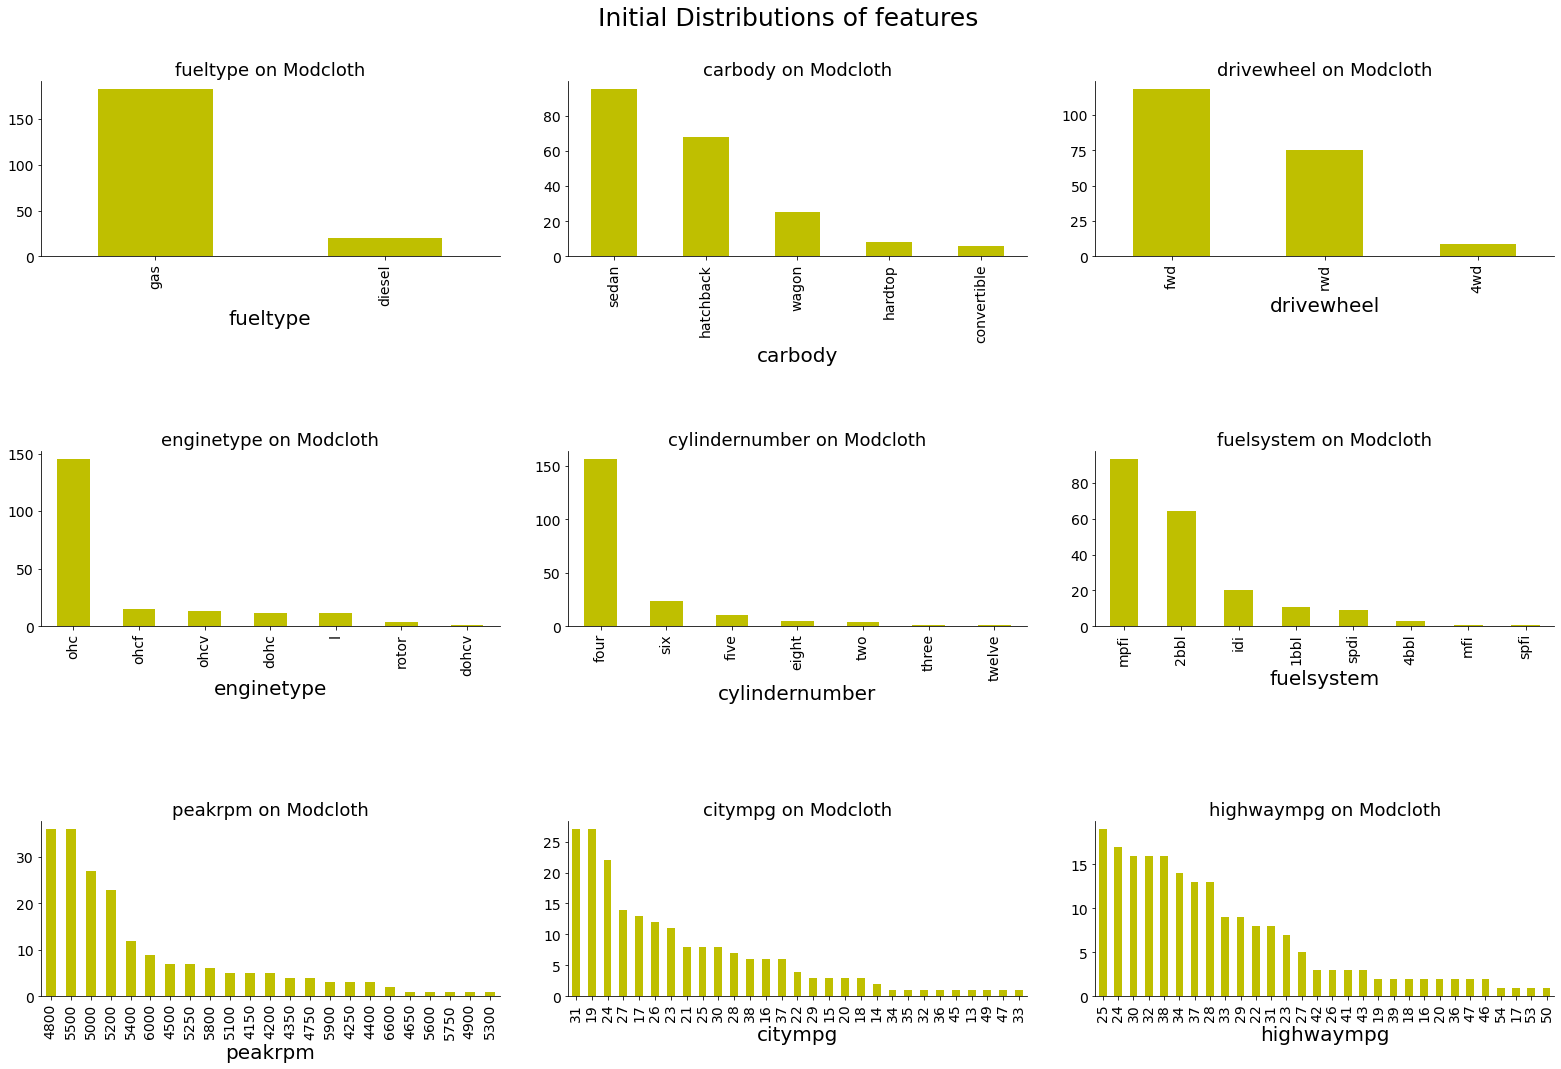

In [32]:
def plot_dist(col, ax):
    dataset[col][dataset[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize= 18)
    return ax
f, ax = plt.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=12, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['fueltype','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','peakrpm','citympg','highwaympg','price']
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

# Kategorik verileri
Kategorik veriler, sayısal değerler yerine etiket değerleri içeren değişkenlerdir. Bazı algoritmalar doğrudan kategorik verilerle çalışabilir. Örneğin, bir karar ağacı, herhangi bir veri dönüşümü gerekmeden doğrudan kategorik verilerden öğrenilebilir (bu, belirli uygulamaya bağlıdır). Birçok makine öğrenimi algoritması, doğrudan etiket verileri üzerinde çalışamaz. Tüm girdi değişkenlerinin ve çıktı değişkenlerinin sayısal olmasını gerektirirler. Bu, kategorik verilerin sayısal bir forma dönüştürülmesi gerektiği anlamına gelir. Veri setimizde kategorik veriler içeren 1 adet kolon bulunmaktadır.
i. Etiket Kodlayıcı:
* Sayısal olmayan etiketleri sayısal etiketlere (veya nominal kategorik değişkenlere) dönüştürmek için kullanılır.
* Sayısal etiketler her zaman 0 ile n_classes-1 arasındadır.
ii. OneHotEncoder:
* Kategorik tamsayı özelliklerini one-hot aka one-of-K şemasını kullanarak kodlayın.
* Bu transformatörün girişi, kategorik (ayrık) özellikler tarafından alınan değerleri gösteren bir tamsayı matrisi olmalıdır.
* Çıktı, her sütunun bir özelliğin olası bir değerine karşılık geldiği seyrek bir matris olacaktır.
* Girdi özelliklerinin [0, n_values] aralığında değerler aldığı varsayılır.
* Bu kodlama, kategorik verileri birçok scikit-learn tahmincisine, özellikle doğrusal modeller ve standart çekirdekli SVM'lere beslemek için gereklidir.

In [33]:
# Separate the dependent and independent variables

# Independent variable
# iloc[rows,columns]
# Take all rows
# Take last but one column from the dataset (:-1)
X = dataset.iloc[:,:-1].values

# Dependent variable
# iloc[rows,columns]
# Take all rows
# Take last column from the dataset (:-1)
Y = dataset.iloc[:,17].values



In [34]:
# Print the X and Y
print ('X: %s'%(str(X)))
print ('-----------------------------------')
print ('Y: %s'%(str(Y)))

X: [[1 3 'alfa-romero giulia' ... 5000 21 27]
 [2 3 'alfa-romero stelvio' ... 5000 21 27]
 [3 1 'alfa-romero Quadrifoglio' ... 5000 19 26]
 ...
 [203 -1 'volvo 244dl' ... 5500 18 23]
 [204 -1 'volvo 246' ... 4800 26 27]
 [205 -1 'volvo 264gl' ... 5400 19 25]]
-----------------------------------
Y: [13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16925.    20970.    21105.    24565.
 30760.    41315.    36880.     5151.     6575.     5572.     6377.
  7957.     6692.     7609.     8558.     8921.    12964.     6479.
  6855.     5399.     6529.     7129.     7295.     7295.     7895.
  9095.     8845.    10295.    12945.    10345.     6785.     8916.5
  8916.5   11048.    32250.    35550.    36000.     5195.     6095.
  6795.     6695.     7395.    10945.    11845.    13645.    15645.
  8845.     8495.    10595.    10245.    10795.    11245.    18280.
 18344.    25552.    28248.    28176.    31600.    34184.    35056.
 40960.    45400.   

In [35]:
#--------------------------------------------------------------
#       Adım 4 : Kategorik verileri bulma                   
#--------------------------------------------------------------

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelencoder_X = LabelEncoder()
X[:,2] = labelencoder_X.fit_transform(X[:,2])
X[:,2]

array([2, 3, 1, 4, 5, 9, 5, 7, 6, 8, 10, 11, 12, 15, 13, 14, 12, 24, 25,
       33, 26, 31, 28, 27, 29, 32, 30, 37, 41, 37, 35, 41, 36, 40, 34, 39,
       42, 34, 37, 38, 45, 43, 44, 43, 47, 46, 48, 50, 49, 59, 57, 56, 51,
       52, 58, 53, 51, 55, 54, 57, 56, 51, 52, 58, 19, 17, 16, 22, 20, 23,
       18, 21, 60, 63, 62, 66, 61, 64, 61, 66, 61, 64, 65, 67, 66, 64, 0,
       71, 79, 74, 81, 75, 72, 74, 76, 68, 79, 77, 69, 70, 78, 80, 73, 68,
       83, 82, 84, 83, 83, 86, 83, 85, 83, 83, 86, 90, 87, 90, 91, 89, 92,
       88, 96, 93, 95, 94, 95, 97, 98, 99, 101, 101, 100, 100, 99, 102,
       105, 105, 102, 104, 103, 106, 107, 108, 109, 105, 105, 121, 118,
       114, 119, 115, 110, 123, 114, 118, 113, 118, 113, 123, 116, 118,
       112, 117, 120, 113, 124, 125, 113, 122, 113, 111, 118, 113, 123,
       116, 118, 124, 126, 127, 128, 131, 135, 129, 134, 130, 143, 144,
       132, 133, 130, 137, 136, 138, 139, 141, 142, 137, 136, 138, 140,
       141], dtype=object)

In [36]:
labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])
X[:,3]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1], dtype=object)

In [37]:
labelencoder_X = LabelEncoder()
X[:,4] = labelencoder_X.fit_transform(X[:,4])
X[:,5] = labelencoder_X.fit_transform(X[:,5])
X[:,6] = labelencoder_X.fit_transform(X[:,6])
X[:,7] = labelencoder_X.fit_transform(X[:,7])
X[:,8] = labelencoder_X.fit_transform(X[:,8])
X[:,10] = labelencoder_X.fit_transform(X[:,10])

In [38]:
#--------------------------------------------------------------
#       Adım 5 : Verileri Test Train e ayırma                
#--------------------------------------------------------------

from sklearn.model_selection import train_test_split

# The test size is taken as 20% of the total dataset i.e., out of 15 only 3 rows are taken as test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [39]:
# Print the shape of the dataset
print ('X_train: %s'%(str(X_train.shape)))
print ('----------------')
print ('X_test: %s'%(str(X_test.shape)))
print ('----------------')
print ('Y_train: %s'%(str(Y_train.shape)))
print ('----------------')
print ('Y_test: %s'%(str(Y_test.shape)))
print ('----------------')

X_train: (161, 17)
----------------
X_test: (41, 17)
----------------
Y_train: (161,)
----------------
Y_test: (41,)
----------------


In [40]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

# We need to fit and transform the training set
X_train = sc_X.fit_transform(X_train)

# We need to fit the test set
X_test = sc_X.transform(X_test)

In [41]:
X_train

array([[-0.58140907, -0.63391061, -1.49085445, ..., -1.59650288,
        -0.53540905, -0.87714049],
       [-1.26868411,  1.79608007, -1.14201339, ..., -0.23263328,
        -0.99392424, -1.02272773],
       [ 0.2261391 , -0.63391061,  0.17859919, ..., -2.01615507,
         0.38162134,  0.2875574 ],
       ...,
       [ 0.2948666 ,  0.17608628,  0.35301972, ...,  0.81649719,
         0.84013653,  1.01549358],
       [-0.90786471,  0.17608628, -0.64366902, ..., -0.23263328,
         0.68729814, -0.00361707],
       [ 1.23986978, -1.44390751,  1.05070184, ..., -1.91124202,
         0.22878294,  0.14197016]])

In [42]:
X_test

array([[-1.42332099e+00, -6.33910613e-01, -1.26659948e+00,
         3.20530382e-01, -9.57427108e-01,  5.51663404e-01,
        -6.56518229e-01, -7.45097323e-02, -1.08831667e-01,
        -8.75820079e-01, -1.08042552e+00, -4.43389138e-01,
        -1.23244191e-01, -8.49715963e-01,  6.06671095e-01,
         1.91000532e+00,  1.74342976e+00],
       [ 1.22268791e+00, -1.44390751e+00,  8.76281311e-01,
        -3.11982906e+00, -9.57427108e-01,  5.51663404e-01,
        -6.56518229e-01, -7.45097323e-02, -1.08831667e-01,
         2.42508345e-02, -9.48815608e-02,  3.21286438e-01,
         3.19624563e+00, -7.72657606e-01, -1.28176374e+00,
         6.87298136e-01,  2.87557398e-01],
       [ 1.23047845e-01, -6.33910613e-01,  1.78599193e-01,
        -3.11982906e+00, -9.57427108e-01,  1.78524407e+00,
         1.19785782e+00, -1.07418197e+00, -1.08831667e-01,
         6.25976900e-01, -9.48815608e-02,  8.62931638e-01,
         2.81025844e+00, -2.07562987e-01, -2.01615507e+00,
        -7.68938522e-02, -8.7